## Minicurso - Análise exploratória

## Mateus Pedrino - Igor Martinelli

Este notebook se dedica à análise exploratória de diferentes bases de dados. Serão comentadas distribuições, análise de outliers, valores ausentes, correlações, entre outros.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

###  Descrição dos dados

In [2]:
# Dataset do kaggle : iot (predict user transportation mode)
# link : https://www.kaggle.com/fschwartzer/tmd-dataset-5-seconds-sliding-window

In [3]:
data = pd.read_csv('data/dataset_5secondWindow%5B1%5D.csv')
data.head()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car


In [4]:
# Dimensão dos dados
data.shape

(5893, 14)

In [5]:
# Ver infos sobre nossas variáveis numéricas
data.describe()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std
count,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000
mean,117.731716,10.007976,8.426262,12.247691,0.982987,0.274351,0.078560,0.645235,0.166669,65.445964,65.218848,65.672381,1.318661
std,126.474151,0.655949,1.783007,5.178436,1.505615,0.529583,0.195519,1.293279,0.327209,32.136026,32.129213,32.180745,2.871450
min,3.000000,7.369055,0.337166,8.801019,0.001286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,9.737143,7.805295,10.015566,0.078055,0.007377,0.002044,0.014884,0.003247,58.402467,57.741088,58.879778,0.000000
50%,70.000000,9.850143,9.123124,10.602081,0.369163,0.035267,0.008777,0.078057,0.019004,79.475484,79.086780,79.862550,0.037179
75%,152.000000,10.078998,9.691731,12.291575,1.058376,0.205268,0.054033,0.532054,0.135955,89.722940,89.720104,89.726909,1.487859
max,682.000000,17.427391,12.115013,66.886376,12.879851,5.662153,3.232744,28.860752,4.980892,90.308734,90.308734,90.308734,26.835546


In [6]:
# Tipos das variáveis
data.dtypes

time                                 float64
android.sensor.accelerometer#mean    float64
android.sensor.accelerometer#min     float64
android.sensor.accelerometer#max     float64
android.sensor.accelerometer#std     float64
android.sensor.gyroscope#mean        float64
android.sensor.gyroscope#min         float64
android.sensor.gyroscope#max         float64
android.sensor.gyroscope#std         float64
sound#mean                           float64
sound#min                            float64
sound#max                            float64
sound#std                            float64
target                                object
dtype: object

In [7]:
# Checar dados nulos
data.isna().sum()

time                                 0
android.sensor.accelerometer#mean    0
android.sensor.accelerometer#min     0
android.sensor.accelerometer#max     0
android.sensor.accelerometer#std     0
android.sensor.gyroscope#mean        0
android.sensor.gyroscope#min         0
android.sensor.gyroscope#max         0
android.sensor.gyroscope#std         0
sound#mean                           0
sound#min                            0
sound#max                            0
sound#std                            0
target                               0
dtype: int64

In [8]:
# Variavel dependente
data.target.unique()

array(['Still', 'Car', 'Train', 'Bus', 'Walking'], dtype=object)

In [9]:
# Distribuição de valores
data.target.value_counts()

Car        1180
Train      1179
Still      1179
Bus        1178
Walking    1177
Name: target, dtype: int64

Para datasets com classes desbalanceadas : 
https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

### Correlação

In [11]:
# Time é só uma aferição, também é uma variável que pode ser dropada
data.drop('time', axis = 1, inplace = True)

In [12]:
# Correlação (por matriz)
cormatrix=data.corr()

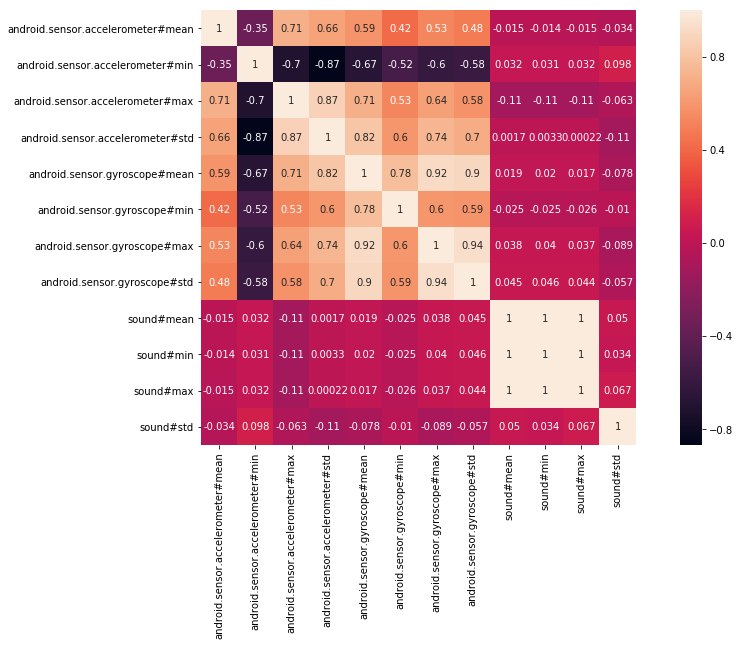

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(cormatrix, annot=True ,square=True)
plt.show()

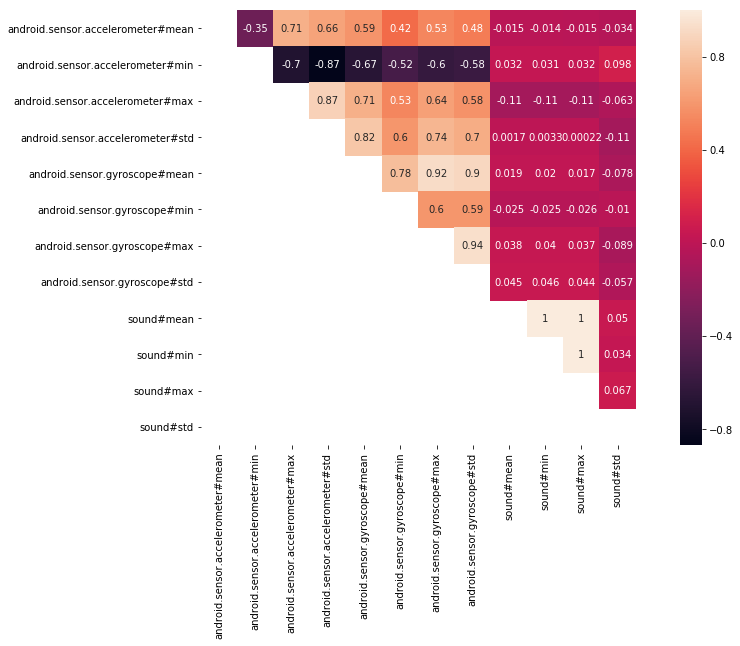

In [14]:
# Triangular superior da matrix de correlação
fig, ax = plt.subplots(figsize=(16, 8))
upper = cormatrix.where(np.triu(np.ones(cormatrix.shape), k=1).astype(np.bool))
sns.heatmap(upper, annot=True ,square=True)
plt.show()

In [15]:
# Considerar somente as colunas cuja correlação abs dela com qualquer outra seja superior a cidx
cidx = 0.5
to_drop = [column for column in upper.columns if any(abs(upper[column]) > cidx)]

In [17]:
to_drop

['android.sensor.accelerometer#max',
 'android.sensor.accelerometer#std',
 'android.sensor.gyroscope#mean',
 'android.sensor.gyroscope#min',
 'android.sensor.gyroscope#max',
 'android.sensor.gyroscope#std',
 'sound#min',
 'sound#max']

In [18]:
# Só para ter noção da correlação (correlacao, p_valor)
coef = ss.pearsonr(data['sound#mean'], data['sound#min'])

In [19]:
coef = coef[0]

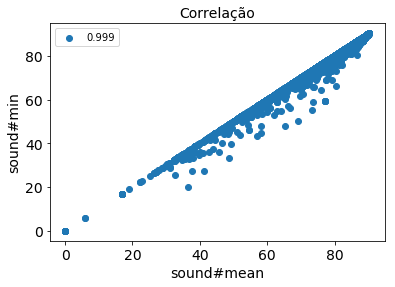

In [20]:
plt.title('Correlação', fontsize = 14)
plt.scatter(data['sound#mean'], data['sound#min'], label = str(round(coef, 3)))
plt.xlabel('sound#mean', fontsize = 14)
plt.ylabel('sound#min', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend()
plt.show()

In [21]:
# Dropar colunas acima para correlação
data.drop(to_drop, axis=1, inplace = True) # variavel alvo é categórica

In [22]:
cormatrix_less_cor = data.drop('target', axis = 1).corr()

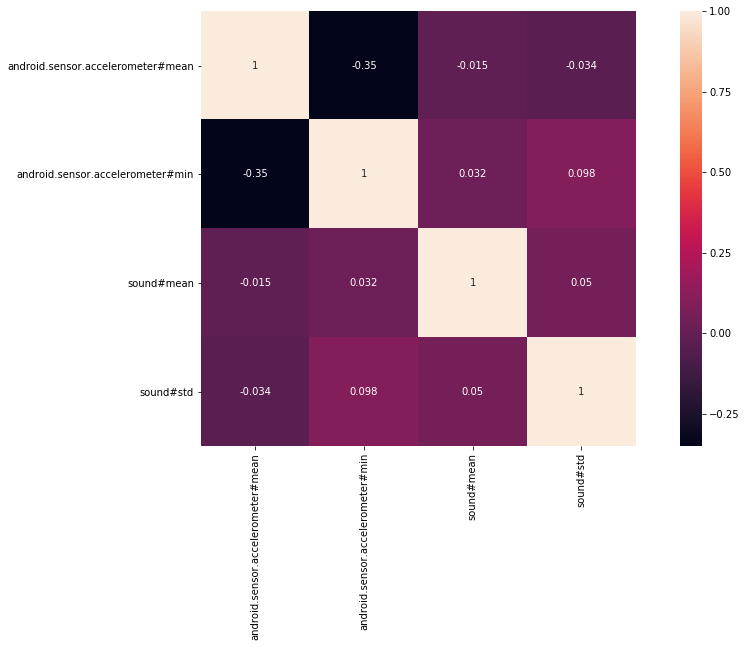

In [23]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(cormatrix_less_cor, annot=True ,square=True)
plt.show()

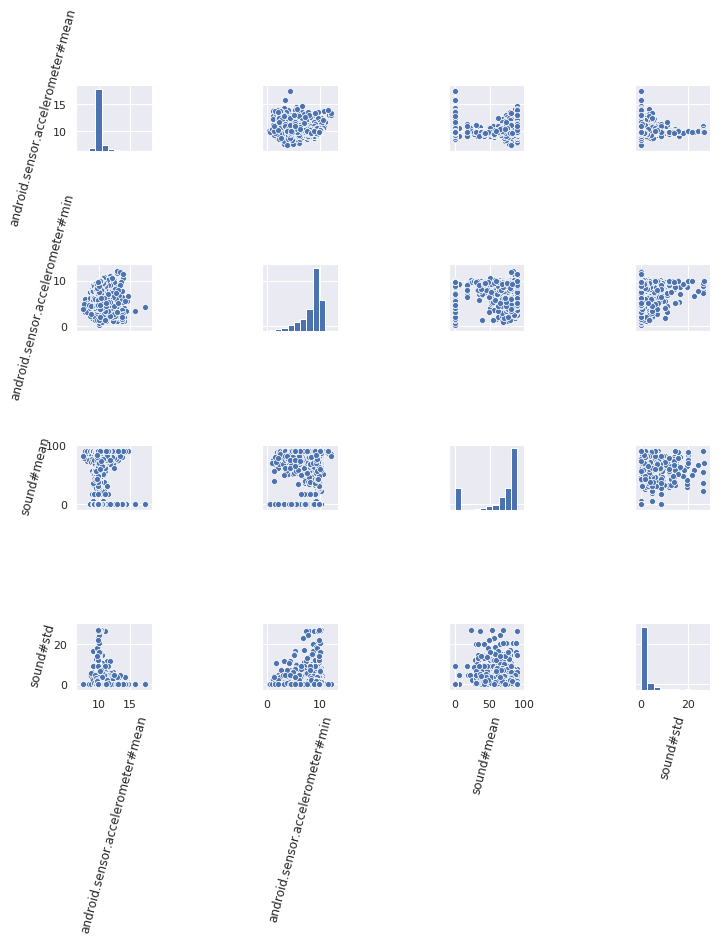

In [45]:
# Da para fazer um pairplot agora que tem menos colunas
sns.set()
g = sns.pairplot(data, height = 2.5)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), rotation = 75)
    ax.set_ylabel(ax.get_ylabel(), rotation = 75)
plt.show()

In [27]:
data.head()

,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,sound#mean,sound#std,target
0,9.811476,9.758895,0.000000,0.000000,Still
1,9.939207,7.707437,89.200210,0.191013,Car
2,9.827178,9.804817,0.000000,0.000000,Still
3,9.673039,7.659674,87.470377,2.284186,Car
4,9.993466,8.965621,89.770732,0.006389,Car


### Outliers

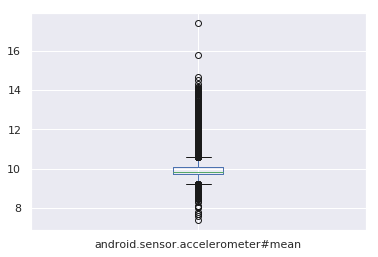

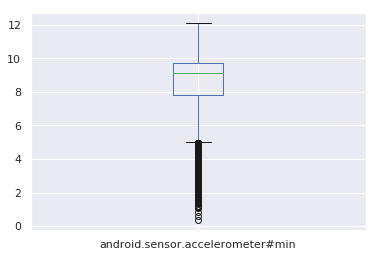

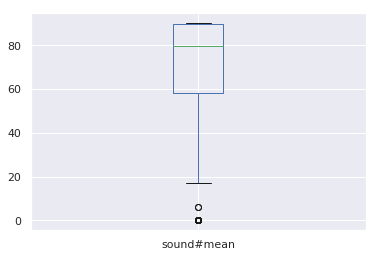

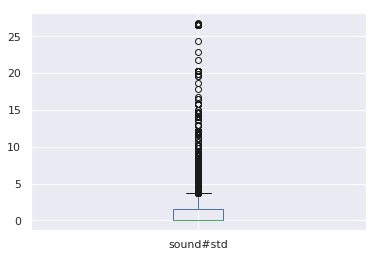

In [92]:
# Outliers !
for column in data.columns[:-1]:
    plt.figure()
    data.boxplot([column])

In [93]:
xdata = data.drop('target', axis = 1)
ydata = data[data.columns[-1]]

In [94]:
# Distancia inter-quartil
Q1 = xdata.quantile(0.25)
Q3 = xdata.quantile(0.75)
IQR = Q3 - Q1
v=1.5 # ponderamento de IQR

# Remove outliers 
df_no_out_x=xdata[~((xdata < (Q1 - v * IQR)) | (xdata > (Q3 + v * IQR))).any(axis=1)]
df_no_out_y=ydata[~((xdata < (Q1 - v * IQR)) | (xdata > (Q3 + v * IQR))).any(axis=1)]

In [95]:
df_no_out_x.shape

(3627, 4)

In [96]:
df_no_out_y.shape

(3627,)

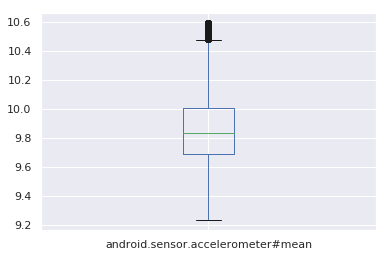

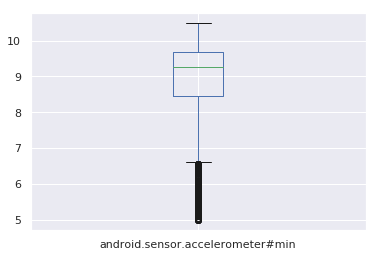

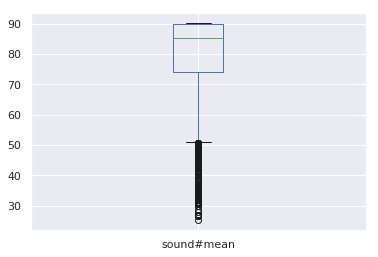

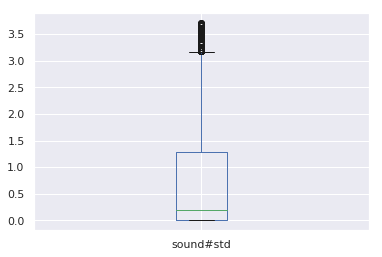

In [97]:
# Repete o processo
for column in df_no_out_x:
    plt.figure()
    df_no_out_x.boxplot([column])

Melhorou bastante ;)

In [98]:
# Reconstituindo o dataframe sem outliers
df = pd.concat([df_no_out_x, df_no_out_y], axis = 1)
df.head()

,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,sound#mean,sound#std,target
1,9.939207,7.707437,89.200210,0.191013,Car
3,9.673039,7.659674,87.470377,2.284186,Car
4,9.993466,8.965621,89.770732,0.006389,Car
5,9.330482,9.149029,57.361127,1.006611,Car
6,9.789771,9.758751,65.158369,0.000000,Train


### Normalização e padronização

In [174]:
# Podemos agora normalizar ou padronizar os dados (de entrada) -> trazer todo mundo para a mesma escala !
scaler_ss = StandardScaler()
scaler_mm = MinMaxScaler()

In [108]:
X = np.array(df[df.columns[:-1]])
Y = np.array(df[df.columns[-1]])

In [109]:
X

array([[9.93920678e+00, 7.70743742e+00, 8.92002102e+01, 1.91013358e-01],
       [9.67303911e+00, 7.65967373e+00, 8.74703771e+01, 2.28418636e+00],
       [9.99346632e+00, 8.96562096e+00, 8.97707323e+01, 6.38923522e-03],
       ...,
       [9.70274609e+00, 8.35997444e+00, 7.90703616e+01, 1.76089386e+00],
       [1.01395759e+01, 1.00102777e+01, 8.97444649e+01, 5.50057261e-03],
       [9.60883298e+00, 9.21885397e+00, 8.26848175e+01, 1.47211421e+00]])

In [110]:
Y

array(['Car', 'Car', 'Car', ..., 'Car', 'Train', 'Train'], dtype=object)

In [111]:
X_ss = scaler_ss.fit_transform(X)
X_mm = scaler_mm.fit_transform(X)

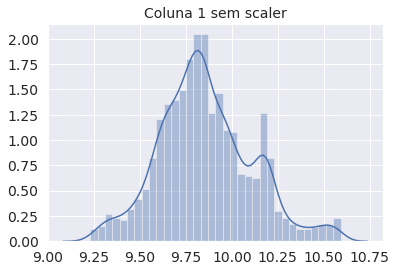

In [117]:
# Olhar, por exemplo, a diferença que surgiu no android.sensor.accelerometer#mean (variavel 1)
plt.figure()
plt.title('Coluna 1 sem scaler', fontsize = 14)
sns.distplot(X[:,0])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

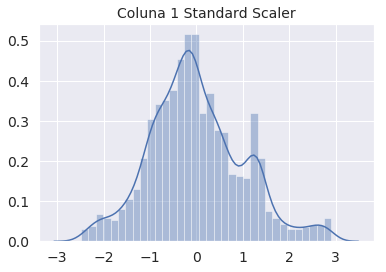

In [118]:
# Olhar, por exemplo, a diferença que surgiu no android.sensor.accelerometer#mean (variavel 1)
plt.figure()
plt.title('Coluna 1 Standard Scaler', fontsize = 14)
sns.distplot(X_ss[:,0])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [122]:
print('Media : ', round(X_ss[:,0].mean(), 3))
print('Desv. Padrão : ', X_ss[:,0].std())
print('Max : ', X_ss[:,0].max())
print('Min : ', X_ss[:,0].min())

Media :  0.0
Desv. Padrão :  1.0
Max :  2.9104429231856987
Min :  -2.4853795224081896


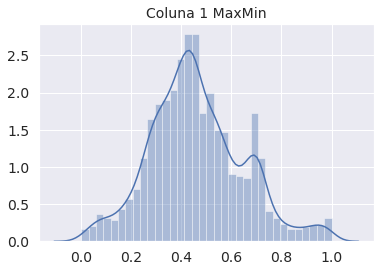

In [121]:
# Olhar, por exemplo, a diferença que surgiu no android.sensor.accelerometer#mean (variavel 1)
plt.figure()
plt.title('Coluna 1 MaxMin', fontsize = 14)
sns.distplot(X_mm[:,0])
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [124]:
print('Media : ', round(X_mm[:,0].mean(), 3))
print('Desv. Padrão : ', round(X_mm[:,0].std(), 3))
print('Max : ', X_mm[:,0].max())
print('Min : ', X_mm[:,0].min())

Media :  0.461
Desv. Padrão :  0.185
Max :  1.0
Min :  0.0


Percebam que a distribuição não mudou !

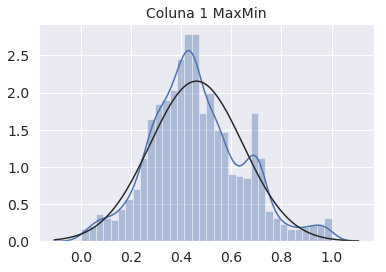

In [145]:
# Teste de normalidade (para modelos paramétricos)
plt.figure()
plt.title('Coluna 1 MaxMin', fontsize = 14)
sns.distplot(X_mm[:,0], fit = ss.norm)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [146]:
ss.skew(X_mm[:,0]) # Positivo é deslocado para esquerda

0.3552680488988494

In [147]:
ss.kurtosis(X_mm[:,0]) # Positivo é deslocado para cima

0.18222293439728388

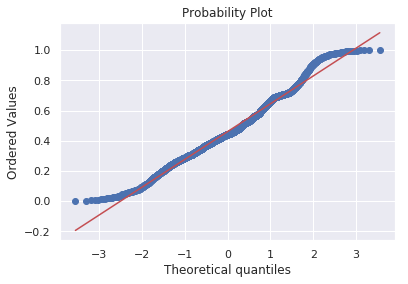

In [149]:
# Teste de normalidade -> quanto mais em cima da reta -> melhor (QQ plot - quantile-quantile)
fig = plt.figure()
ss.probplot(X_mm[:,0], plot=plt) # normal probaxbility plot
plt.show()

In [175]:
x_bc = ss.boxcox(1 + X_mm[:,0]) # Precisa ser positivo, seg. argumento é o lambda que maximiza a transformacao

Não esquecer de transformar e somar 1 nos dados de teste também

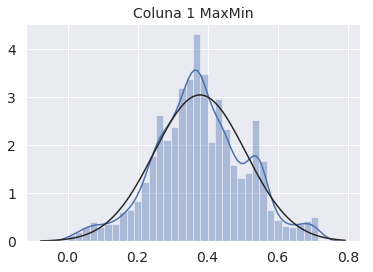

In [176]:
# Olhar, por exemplo, a diferença que surgiu no android.sensor.accelerometer#mean (variavel 1)
plt.figure()
plt.title('Coluna 1 MaxMin', fontsize = 14)
sns.distplot(x_bc[0], fit = ss.norm)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [170]:
ss.skew(x_bc[0])

0.00039495987318127664

In [171]:
ss.kurtosis(x_bc[0])

0.0968148725862914

Se aproximaram de zero ! Portanto a transformação foi, de certo modo, eficiente

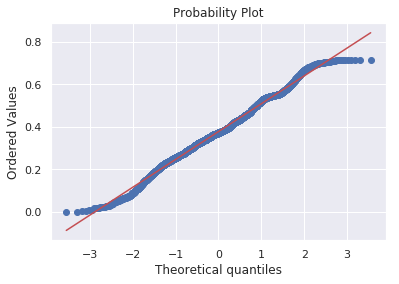

In [172]:
# Teste de normalidade -> quanto mais em cima da reta -> melhor
fig = plt.figure()
ss.probplot(x_bc[0], plot=plt) # normal probaxbility plot
plt.show()

In [177]:
# Podemos adicionar essa ultima transformação aos nossos dados normalizados, então
X_mm.shape

(3627, 4)

In [184]:
X_bc = X_mm.copy()
for i in range(X_mm.shape[1]):
    X_bc[:,i] = ss.boxcox(1 + X_mm[:,i])[0]

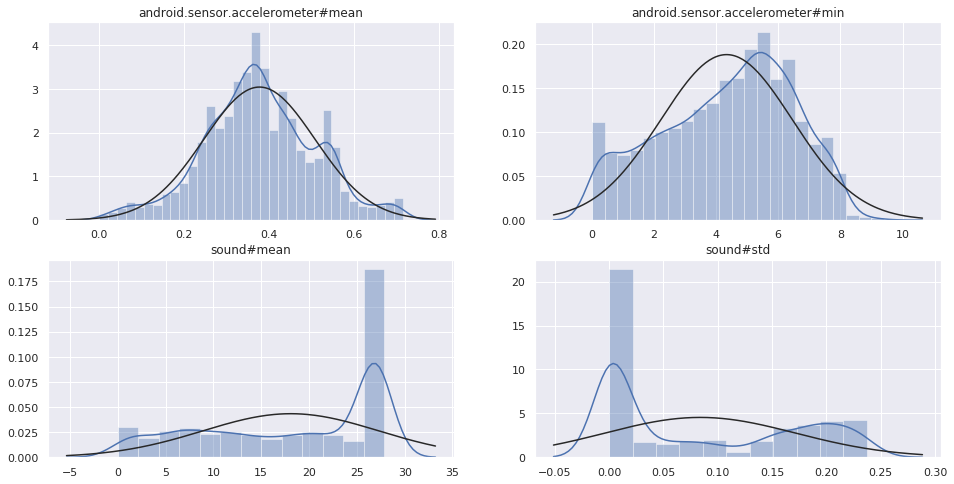

In [199]:
fig, ax = plt.subplots(2, 2, figsize = (16,8))
for i, ax in zip(range(X_bc.shape[1]), ax.flat):
    ax.set_title(df.columns[i])
    sns.distplot(X_bc[:,i], fit = ss.norm, ax=ax)
plt.show()

Tem casos que isso não resolve. Solução : achar outra maneira de transformar os dados, tentar modelos paramétricos que não exijam distribuições normais ou simplesmente tentar modelos não paramétricos.

### Divisão treinamento e teste

In [200]:
# Por fim : divisão dos dados em treinamento e teste para treinar o modelo
p = 0.7
train_x, test_x, train_y, test_y = train_test_split(X_ss, Y, test_size = 1-p, random_state = 42)

In [206]:
# Lembrando o shape original e o que se espera
print('Dimensão original : ', df.shape, '\n')
print('Qte linhas esperadas : ')
print(str(df.shape[0])+'x0.7 = '+ str(round(0.7*df.shape[0], 2)))
print(str(df.shape[0])+'x0.3 = '+ str(round(0.3*df.shape[0], 2)))

Dimensão original :  (3627, 5) 

Qte linhas esperadas : 
3627x0.7 = 2538.9
3627x0.3 = 1088.1


In [207]:
print('Dimensão matriz de entrada de treinamento : ',train_x.shape)
print('Dimensão matriz de entrada de teste : ',test_x.shape)
print('Dimensão matriz de saída de treinamento : ',train_y.shape)
print('Dimensão matriz de saída de teste : ',test_y.shape)

Dimensão matriz de entrada de treinamento :  (2538, 4)
Dimensão matriz de entrada de teste :  (1089, 4)
Dimensão matriz de saída de treinamento :  (2538,)
Dimensão matriz de saída de teste :  (1089,)


### Valores ausentes

In [265]:
# Dataset kaggle : titanic (passageiro sobreviveu ou não ?)
# Link : https://www.kaggle.com/c/titanic

In [292]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [293]:
df.shape

(891, 12)

In [305]:
df.Survived.unique()

array([0, 1])

In [306]:
df.Survived.value_counts()

0    549
1    340
Name: Survived, dtype: int64

Variáveis inúteis : PassengerId, Name, Ticket, Cabin (são apenas identificadores)

In [295]:
df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [296]:
# Valores nulos (vamos formar um dataframe relacionando a contagem e porcentagem)

# Total por feature
total = df.isnull().sum().sort_values(ascending=False)

# Porcentagem de ausentes por feature
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

# Concatenar em um dataframe
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [297]:
missing_data.head()

,Total,Percent
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000


Como há menos de 40% de valores nulos nas features que possuem valores nulos, vamos substituir os valores nulos por não nulos. Para dados numéricos (Age) será utilizada a media e para dados categóricos (Embarked), como há apenas duas instâncias nulas as mesmas serão descartadas. Vale ressaltar que para valores categóricos, os mesmos podem ser substituídos pela moda.

In [298]:
# Tratar variaveis continuas
df['Age'].fillna((df['Age'].mean()), inplace=True)

In [299]:
# Tratar variáveis categóricas
df.dropna(inplace = True) # Os unicos ausentes são do Embarked agora
# Ou substituir pela moda (descomentar linhas abaixo e comentar linha acima antes de executar a célula)
#mode = ss.mode(df['Embarked'].dropna()).mode.item()
#df['Embarked'].fillna(mode, inplace=True)

In [300]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [301]:
df.shape # Diminuiu dois pelo drop

(889, 8)

### Variáveis categóricas independentes

In [302]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [308]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [309]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [310]:
# Get dummies em Sex e Embarked !
df_dum = pd.get_dummies(df)
df_dum.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


Variáveis categóricas com apenas duas classes dá para deixar uma única coluna.